In [11]:
import lista8.neuronioE as neuronioE
import lista8.neuronioI as neuronioI
from numpy import zeros, arange, tanh
import matplotlib.pyplot as plt

In [12]:
def dsdt(v, s, tau_s, tau_d):
    eq = (1+tanh(v/4))/2  * (1-s)/tau_s - s/tau_d
    return eq

In [13]:
tmax = 200
dt = 0.001
N = round(tmax/dt)
t = arange(0, tmax, dt)
gie = 0.25
gei = 0.25

In [14]:
VE, hE, nE, sE = zeros(N), zeros(N), zeros(N), zeros(N)
VE[0] = -65
hE[0] = neuronioE.x_inf('h', VE[0])
nE[0] = neuronioE.x_inf('n', VE[0])

In [15]:
VI, hI, nI, sI = zeros(N), zeros(N), zeros(N), zeros(N)
VI[0] = -65
hI[0] = neuronioI.x_inf('h', VI[0])
nI[0] = neuronioI.x_inf('n', VI[0])

In [16]:
t_disparos_E = []
t_disparos_I = []

In [17]:
for k in range(N-1):
    taus, taud = 0.1, 3
    jinj = 1.4*0.99
    jsin = gie * sI[k] * (-80-VE[k])
    VE[k+1] = VE[k] + dt * neuronioE.dvdt(VE[k], hE[k], nE[k], jinj, jsin)
    hE[k+1] = hE[k] + dt * neuronioE.dhdt(VE[k], hE[k])
    nE[k+1] = nE[k] + dt * neuronioE.dndt(VE[k], nE[k])
    sE[k] = dsdt(VE[k], sE[k], taus, taud)
    if VE[k+1] >= 0 > VE[k]:
        t_disparos_E.append(t[k])

    taus, taud = 0.3, 9
    jinj = 0
    jsin = gei * sE[k] * (-VI[k])
    VI[k+1] = VI[k] + dt * neuronioI.dvdt(VI[k], hI[k], nI[k], jinj, jsin)
    hI[k+1] = hI[k] + dt * neuronioI.dhdt(VI[k], hI[k])
    nI[k+1] = nI[k] + dt * neuronioI.dndt(VI[k], nI[k])
    sI[k] = dsdt(VI[k], sI[k], taus, taud)

    if VI[k+1] >= 0 > VI[k]:
        t_disparos_I.append(t[k])

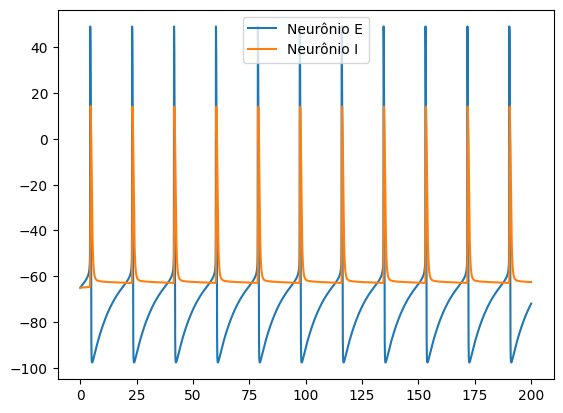

In [18]:
plt.plot(t, VE, label='Neurônio E')
plt.plot(t, VI, label='Neurônio I')
plt.legend()

plt.show()

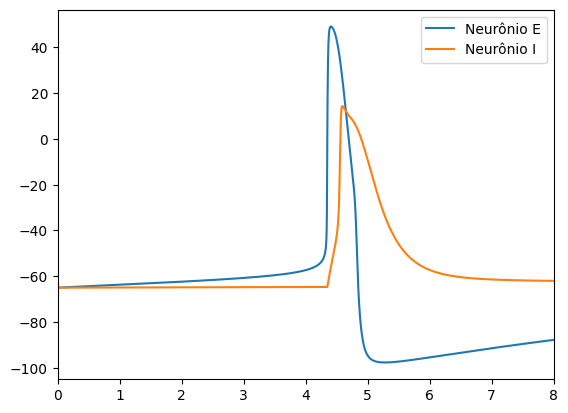

Período com que os dois neurônios disparam
T = 18.59


In [19]:
plt.plot(t, VE, label='Neurônio E')
plt.plot(t, VI, label='Neurônio I')
plt.legend()

plt.axis(xmin=0, xmax=8)
plt.show()

periodo =  t_disparos_E[1] - t_disparos_E[0]
print('Período com que os dois neurônios disparam')
print(f'T = {periodo}')